In [77]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [78]:
df=pd.read_csv("banglore.csv")

In [79]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [80]:
df.shape

(13320, 9)

In [81]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [82]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title="Pandas Profiling Report")
profile

In [83]:
df[df.duplicated()]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
971,Super built-up Area,Ready To Move,Haralur Road,3 BHK,NRowse,1464,3.0,2.0,56.0
1115,Super built-up Area,Ready To Move,Haralur Road,2 BHK,NaN,1027,2.0,2.0,44.0
1143,Super built-up Area,Ready To Move,Vittasandra,2 BHK,Prlla C,1246,2.0,1.0,64.5
1290,Super built-up Area,Ready To Move,Haralur Road,2 BHK,NaN,1194,2.0,2.0,47.0
1394,Super built-up Area,Ready To Move,Haralur Road,2 BHK,NaN,1027,2.0,2.0,44.0
...,...,...,...,...,...,...,...,...,...
13285,Super built-up Area,Ready To Move,VHBCS Layout,2 BHK,OlarkLa,1353,2.0,2.0,110.0
13299,Super built-up Area,18-Dec,Whitefield,4 BHK,Prtates,2830 - 2882,5.0,0.0,154.5
13311,Plot Area,Ready To Move,Ramamurthy Nagar,7 Bedroom,NaN,1500,9.0,2.0,250.0
13313,Super built-up Area,Ready To Move,Uttarahalli,3 BHK,Aklia R,1345,2.0,1.0,57.0


In [84]:
df.drop_duplicates(keep='first',inplace=True)

In [85]:
df.shape

(12791, 9)

In [86]:
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [87]:
df.drop(columns=["availability","society",'balcony','availability'],inplace=True)

In [88]:
df.head()


,area_type,location,size,total_sqft,bath,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00


In [89]:
df.isna().sum()

area_type      0
location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [90]:
df["size"]=df["size"].str.split(" ").str[0]

In [91]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer()
df.loc[:,"bath"]=imp.fit_transform(df[["bath"]])
df.loc[:,"size"]=imp.fit_transform(df[["size"]])

In [92]:
df["size"]=df["size"].astype(int)

In [93]:
df.dropna(inplace=True)

In [94]:
df.isna().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [95]:
df.sample(5)

,area_type,location,size,total_sqft,bath,price
11300,Plot Area,Sabari Nagar,2,1120,2.0,60.0
752,Super built-up Area,Jakkur,2,1279,2.0,77.0
4324,Super built-up Area,Amruthahalli,2,1200,2.0,55.0
11733,Super built-up Area,Prithvi Layout,4,4040,4.0,500.0
13114,Super built-up Area,Mariyannapalya,2,1125,2.0,46.0


In [96]:
df.dtypes

area_type      object
location       object
size            int64
total_sqft     object
bath          float64
price         float64
dtype: object

In [97]:
def isfloat(x):
    try:
        float(x)
    except:
        return False
    return True

In [98]:
df[~df["total_sqft"].apply(isfloat)].head()

,area_type,location,size,total_sqft,bath,price
30,Super built-up Area,Yelahanka,4,2100 - 2850,4.000000,186.000
56,Built-up Area,Devanahalli,4,3010 - 3410,2.708602,192.000
81,Built-up Area,Hennur Road,4,2957 - 3450,2.708602,224.500
122,Super built-up Area,Hebbal,4,3067 - 8156,4.000000,477.000
137,Super built-up Area,8th Phase JP Nagar,2,1042 - 1105,2.000000,54.005


In [99]:

def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [100]:
df["total_sqft"]=df["total_sqft"].apply(convert_sqft_to_num)

In [101]:
df.isna().sum()

area_type      0
location       0
size           0
total_sqft    46
bath           0
price          0
dtype: int64

In [102]:
df[df["total_sqft"].isna()].head()

,area_type,location,size,total_sqft,bath,price
410,Super built-up Area,Kengeri,1,NaN,1.0,18.5
648,Built-up Area,Arekere,9,NaN,9.0,265.0
775,Built-up Area,Basavanagara,1,NaN,2.0,93.0
872,Super built-up Area,Singapura Village,2,NaN,2.0,45.0
1019,Plot Area,Marathi Layout,1,NaN,1.0,110.0


In [103]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer()
df.loc[:,"total_sqft"]=imp.fit_transform(df[["total_sqft"]])

In [104]:
df.isna().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [105]:
df.head()

,area_type,location,size,total_sqft,bath,price
0,Super built-up Area,Electronic City Phase II,2,1056.0,2.0,39.07
1,Plot Area,Chikka Tirupathi,4,2600.0,5.0,120.00
2,Built-up Area,Uttarahalli,3,1440.0,2.0,62.00
3,Super built-up Area,Lingadheeranahalli,3,1521.0,3.0,95.00
4,Super built-up Area,Kothanur,2,1200.0,2.0,51.00


In [106]:
df["location"].value_counts().sort_values(ascending=False).head(240)

Whitefield            523
Sarjapur  Road        379
Electronic City       287
Kanakpura Road        249
Thanisandra           229
                     ... 
Narayanapura           10
Pattandur Agrahara     10
Kalkere                10
BTM 1st Stage          10
Nagadevanahalli        10
Name: location, Length: 240, dtype: int64

In [107]:
top200=df["location"].value_counts().sort_values(ascending=False).head(240).index

In [108]:
top200

Index(['Whitefield', 'Sarjapur  Road', 'Electronic City', 'Kanakpura Road',
       'Thanisandra', 'Yelahanka', 'Marathahalli', 'Hebbal',
       'Raja Rajeshwari Nagar', 'Uttarahalli',
       ...
       'Doddakallasandra', 'LB Shastri Nagar', 'Tindlu',
       'Nagappa Reddy Layout', 'BEML Layout', 'Narayanapura',
       'Pattandur Agrahara', 'Kalkere', 'BTM 1st Stage', 'Nagadevanahalli'],
      dtype='object', length=240)

In [109]:
# def imp(col):
#     X2=col[0]
#     for i in X2:
#         if X2 in top10:
#             return X2
def imp(col):
    for i in col:
        if i in top200:
            return i


In [110]:
df["location"]=df[["location"]].apply(imp,axis=1)

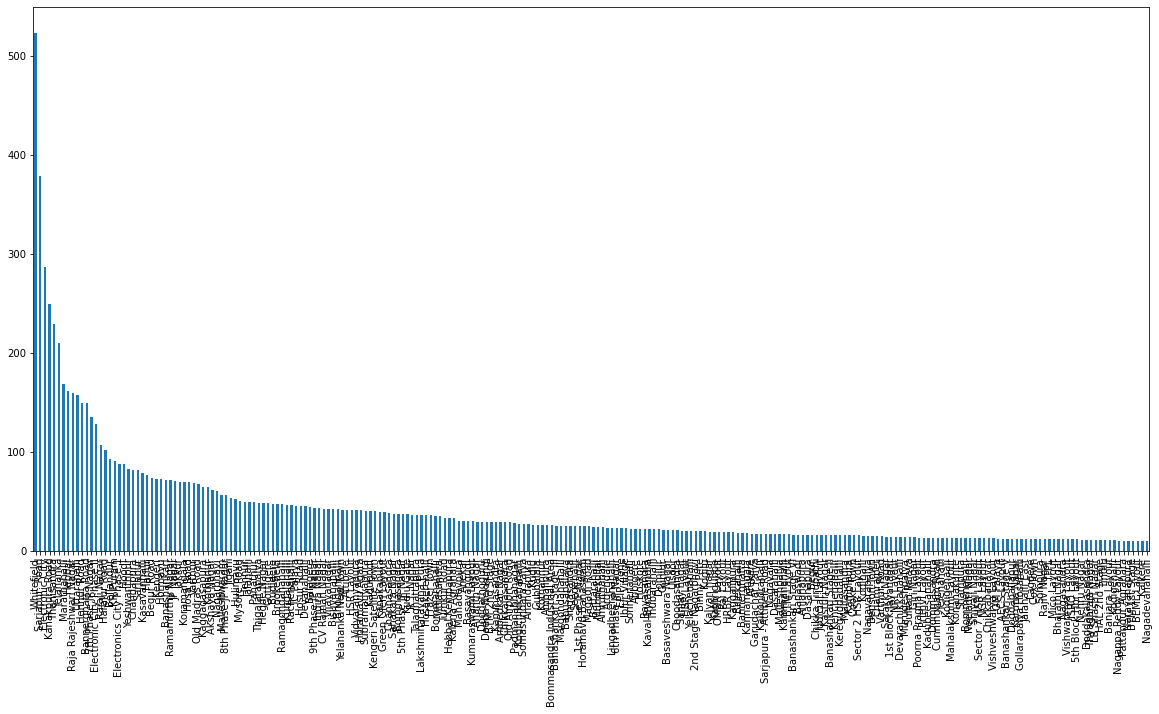

In [111]:
df["location"].value_counts().plot(kind="bar")
plt.show()

In [112]:
df["location"].nunique()

240

In [113]:
df["location"].isna().sum()

2878

In [114]:
df["location"]

0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13314           Green Glen Layout
13315                  Whitefield
13316                        None
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
Name: location, Length: 12790, dtype: object

In [115]:
df["location"].fillna("other",inplace=True)

In [116]:
df["location"].nunique()

241

In [117]:
df.head()

,area_type,location,size,total_sqft,bath,price
0,Super built-up Area,Electronic City Phase II,2,1056.0,2.0,39.07
1,Plot Area,Chikka Tirupathi,4,2600.0,5.0,120.00
2,Built-up Area,Uttarahalli,3,1440.0,2.0,62.00
3,Super built-up Area,Lingadheeranahalli,3,1521.0,3.0,95.00
4,Super built-up Area,Kothanur,2,1200.0,2.0,51.00


In [118]:
# normally square ft per bedroom is 300 
df=df[~(df["total_sqft"]/df["size"]<300)]

In [119]:
df.shape

(12052, 6)

In [120]:
df1 = df.copy()
df1['price_per_sqft'] = df1['price']*100000/df1['total_sqft']

In [121]:
df1.head()

,area_type,location,size,total_sqft,bath,price,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Plot Area,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Built-up Area,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Super built-up Area,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Super built-up Area,Kothanur,2,1200.0,2.0,51.00,4250.000000


In [124]:
df_out = pd.DataFrame()
for key, subdf in df1.groupby('location'):
    m = np.mean(subdf.price_per_sqft)
    st = np.std(subdf.price_per_sqft)
    reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
    df_out = pd.concat([df_out,reduced_df],ignore_index=True)
df_out.shape   

(9927, 7)

In [126]:
df_out.head()

,area_type,location,size,total_sqft,bath,price,price_per_sqft
0,Super built-up Area,Devarachikkanahalli,3,1250.0,2.0,44.0,3520.000000
1,Super built-up Area,Devarachikkanahalli,2,1250.0,2.0,40.0,3200.000000
2,Plot Area,Devarachikkanahalli,2,1200.0,2.0,83.0,6916.666667
3,Super built-up Area,Devarachikkanahalli,2,1170.0,2.0,40.0,3418.803419
4,Super built-up Area,Devarachikkanahalli,3,1425.0,2.0,65.0,4561.403509


In [135]:
df_out.drop(columns=["area_type"],inplace=True)

In [136]:
dummies = pd.get_dummies(df_out.location)
dummies.head(3)

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [138]:
df3 = pd.concat([df_out,dummies.drop('other',axis='columns')],axis='columns')
df3.drop(columns=["location"],inplace=True)

In [139]:
df3.dtypes

size                    int64
total_sqft            float64
bath                  float64
price                 float64
price_per_sqft        float64
                       ...   
Yelachenahalli          uint8
Yelahanka               uint8
Yelahanka New Town      uint8
Yelenahalli             uint8
Yeshwanthpur            uint8
Length: 245, dtype: object

In [140]:
x=df3.drop(columns=["price"])

In [141]:
y=df3["price"]

In [142]:
from sklearn.model_selection import train_test_split
xtr,xt,ytr,yt=train_test_split(x,y,random_state=12,test_size=.25)

In [143]:
from sklearn.neighbors import KNeighborsRegressor
model=KNeighborsRegressor()
model.fit(xtr,ytr)

KNeighborsRegressor()

In [144]:
model.score(xtr,ytr)

0.9485624641888333

In [145]:
model.score(xt,yt)

0.991782359417457

In [146]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(xtr,ytr)

ExtraTreesRegressor()

In [147]:
model.score(xtr,ytr)

0.9999999946772977

In [148]:
model.score(xt,yt)

0.9979698650238031

In [149]:
from sklearn.linear_model import Lasso
model=Lasso(alpha=.05)

In [150]:
model.fit(xtr,ytr)

Lasso(alpha=0.05)

In [151]:
model.score(xtr,ytr)

0.9177887152072856

In [152]:
model.score(xt,yt)

0.9361290552482505

In [153]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
model=RandomForestRegressor()
model.fit(xtr,ytr)

RandomForestRegressor()

In [154]:
model.score(xtr,ytr)

0.9920452501591924

In [155]:
model.score(xt,yt)

0.9980005710227455

In [156]:
import xgboost
reg=xgboost.XGBRegressor()
reg.fit(xtr,ytr)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [157]:
reg.score(xt,yt)

0.996610023774806

In [158]:
model=RandomForestRegressor()
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [159]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [160]:
model=RandomizedSearchCV(estimator=model,param_distributions=random_grid,n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=-1)

In [ ]:
model.fit(xtr,ytr)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/Users/mufseeramusthafa/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   40.2s


In [229]:
model.score(xt,yt)

0.552668417227172